# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [21]:
print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [20]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

1- El conjunto de datos corresponde a precios de casas en Boston, Estados Unidos. Consta de 506 entradas, cada una con los valores de sus 13 características numéricas y categóricas.

2- La variable objetivo a predecir es el precio de las casas. Este depende de diversas características numéricas y categóricas de las mismas.

3- Los atributos disponibles para hacer la predicción son los siguientes:
        
        - CRIM     tasa de crimen per capita por ciudad
        - ZN       proporción de zonas residenciales por lotes mayores a 25,000 pies cuadrados.
        - INDUS    proporción de acres de negocios no minoristas por ciudad
        - CHAS     variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 de lo contrario)
        - NOX      concentración de óxidos nítricos (partes por 10 millones)
        - RM       número promedio de habitaciones por vivienda
        - AGE      proporción de unidades ocupadas por sus propietarios construidas antes de 1940
        - DIS      distancias ponderadas a cinco centros de empleo de Boston
        - RAD      índice de accesibilidad a carreteras radiales
        - TAX      tasa de impuesto a la propiedad de valor total por 10,000 dólares
        - PTRATIO  relación alumno-profesor por localidad
        - B        1000(Bk - 0.63)^2 donde Bk es la proporción de negros por pueblo
        - LSTAT    % de clase baja
        - MEDV     Valor medio de viviendas ocupadas por sus propietarios en 1000 dólares
        
4- Se consideran más determinantes para realizar la predicción los atributos CRIM (tasa de crimen per capita por ciudad), IND (proporción de acres de negocios no minoristas por ciudad), ZN (proporción de zonas residenciales por lotes mayores a 25,000 pies cuadrados.), RM (número promedio de habitaciones por vivienda), RAD (índice de accesibilidad a carreteras radiales) y LSTAT (% de clase baja).


5- A priori se detectan algunas falencias respecto a los datos. Para empezar, tanto las características utilzadas para la predicción como los valores de las mismas están desactualizadas ya que pertenecen a mediados del siglo pasado. Además, dentro de las características, se tienen en cuenta aspectos irrelevantes (incluso discriminatorios) como son "la proporción de negros por pueblo", "la tasa de crimen per cápita por ciudad" y "el porcentaje de clase baja". Bajo estas condiciones se determinó que los datos no son útiles para realizar predicciones futuras situándose en el contexto actual.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

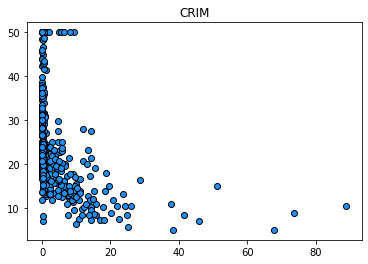

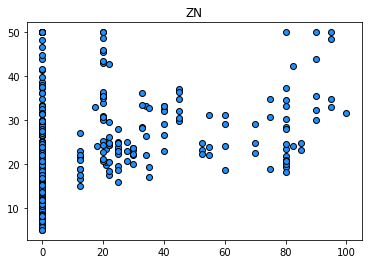

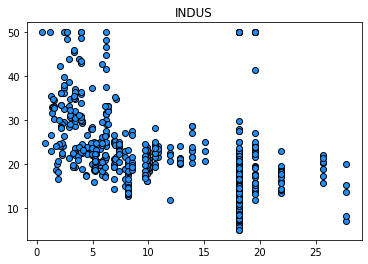

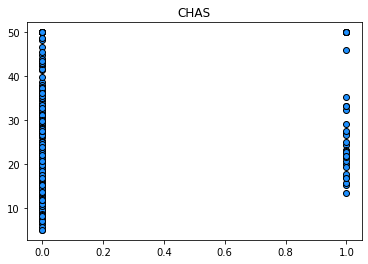

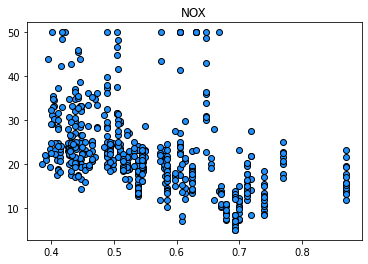

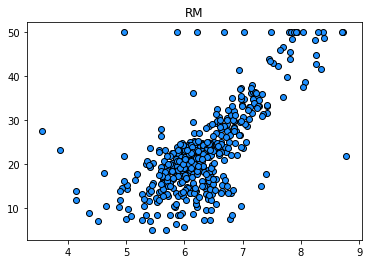

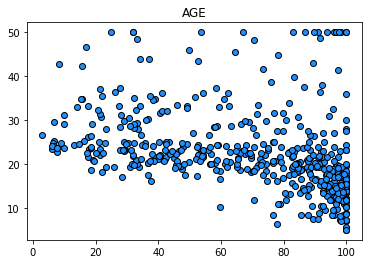

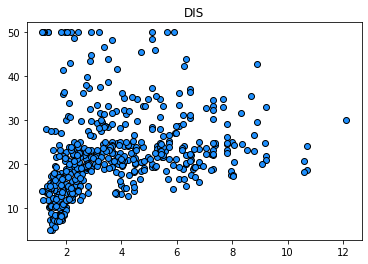

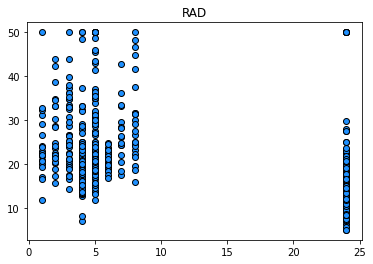

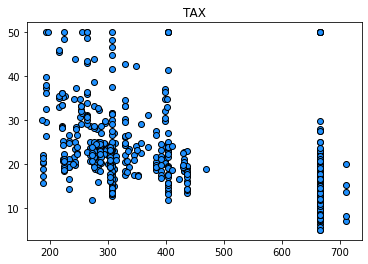

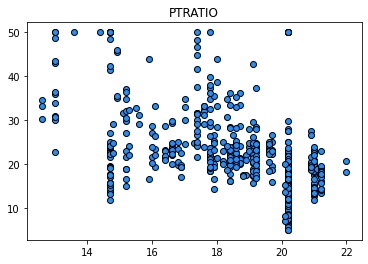

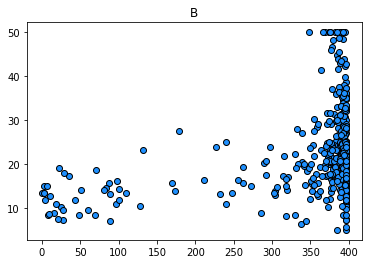

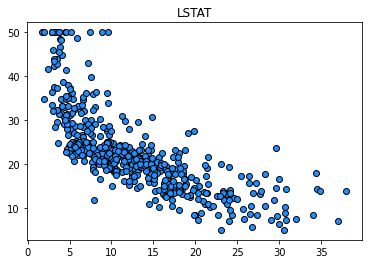

In [22]:
# 1. Resolver acá. Ayuda/ejemplo:
features = boston['feature_names']


In [169]:
def plot_feature(feature):
    
    selector = (boston['feature_names'] == feature)
    
    if feature == 'CHAS':
        sbs.countplot(X[:, selector].flatten())
        plt.xlabel(feature)
        plt.title(feature + ' count')
        plt.show()
    else:
        plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
        
        plt.xlabel(feature)
        plt.ylabel('house prices')
        plt.title(feature + ' - house prices relation')
        plt.show()

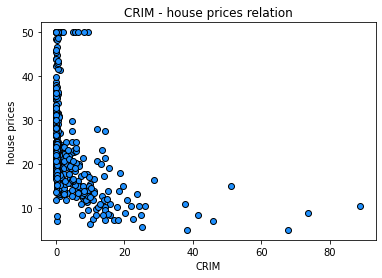

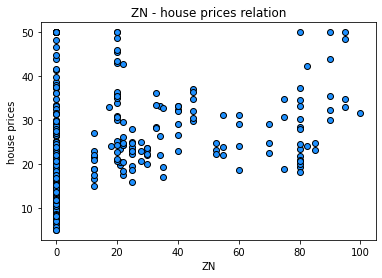

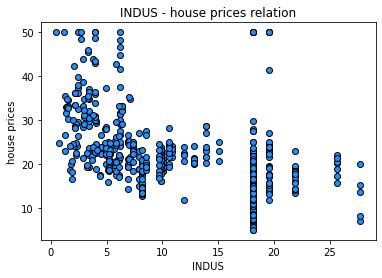

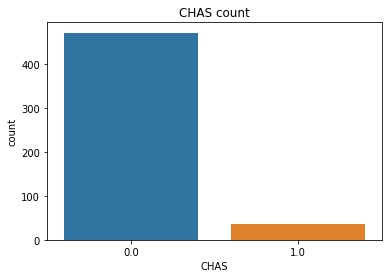

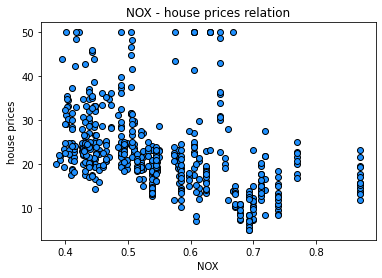

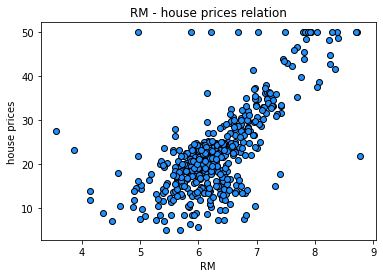

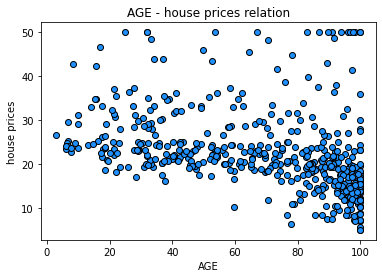

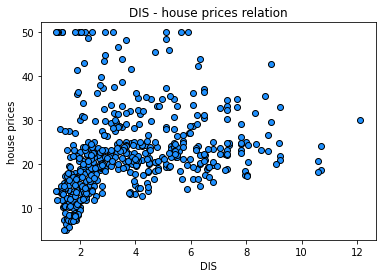

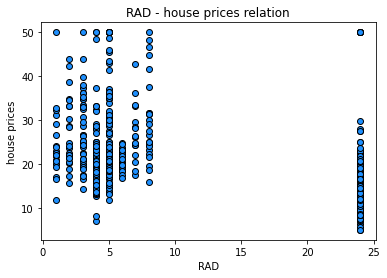

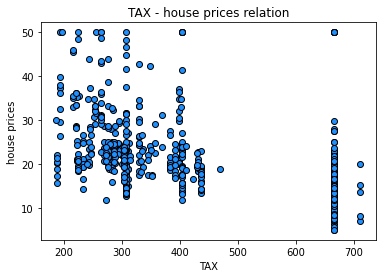

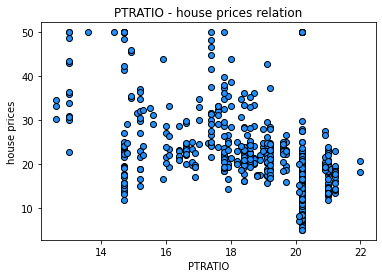

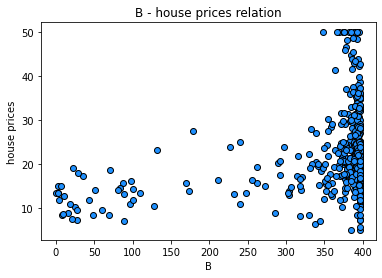

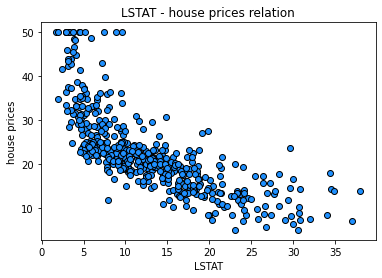

In [170]:
for feature in features:
    plot_feature(feature)

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [25]:
# 1. Resolver acá. Ayuda:
feature = 'RM'  # selecciono el atributo 'RM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
fitted_model = model.fit(X_train_f, y_train)


In [35]:
from sklearn.metrics import mean_squared_error

y_test_pred = fitted_model.predict(X_test_f)
y_train_pred = fitted_model.predict(X_train_f)

mean_sq_tr = mean_squared_error(y_train, y_train_pred)
mean_sq_ts = mean_squared_error(y_test, y_test_pred)

print(f'Train error: {mean_sq_tr}')
print(f'Test error: {mean_sq_ts}')

Train error: 42.82047894172751
Test error: 46.90735162739531


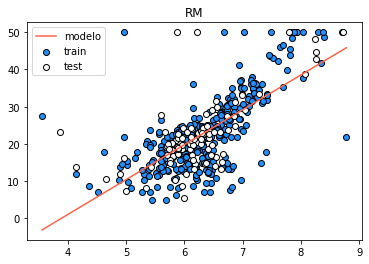

In [39]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, fitted_model.predict(x), color="tomato", label="modelo")


plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.


Min train error: 32.854899667408304
Polinomio grado 9
Min test error: 39.79473116372652
Polinomio grado 2


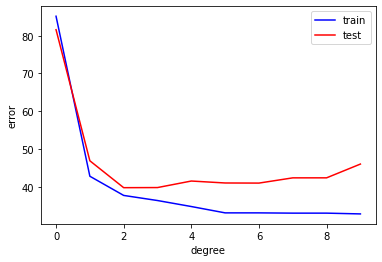

In [159]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
test_errors = []

degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

    
print(f'\nMin train error: {min(train_errors)}')
print('Polinomio grado ' + str(train_errors.index(min(train_errors))))
print(f'Min test error: {min(test_errors)}')
print('Polinomio grado ' + str(test_errors.index(min(test_errors))))

plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

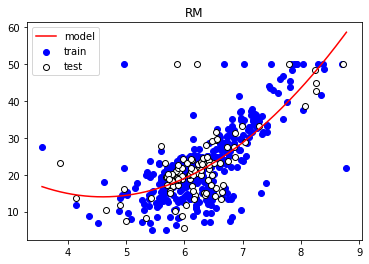

In [135]:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train);

plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.title('RM')
plt.legend()
plt.show()

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

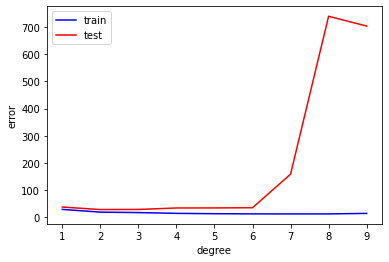

Min train error: 12.140981530791082
Polinomio grado 6
Min test error: 28.14497186312392
Polinomio grado 2


In [161]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LSTAT')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

train_errors = []
test_errors = []

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

print(f'Min train error: {min(train_errors)}')
print('Polinomio grado ' + str(train_errors.index(min(train_errors))))
print(f'Min test error: {min(test_errors)}')
print('Polinomio grado ' + str(test_errors.index(min(test_errors))+1))


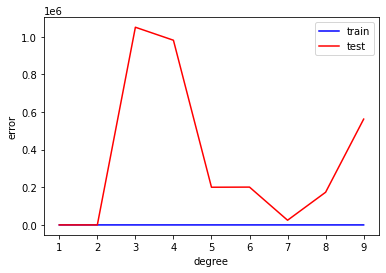


Min train error: 7.410855179950952e-21
Polinomio grado 5
Min test error: 25.21579751639096
Polinomio grado 2


In [171]:
## Ejercicio 7

X_train_fs = X_train
X_test_fs = X_test
X_train_fs.shape, X_test_fs.shape

train_errors = []
test_errors = []

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

print(f'\nMin train error: {min(train_errors)}')
print('Polinomio grado ' + str(train_errors.index(min(train_errors))))
print(f'Min test error: {min(test_errors)}')
print('Polinomio grado ' + str(test_errors.index(min(test_errors))+1))

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
